SCRAPPING 

In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sqlalchemy import create_engine
import pymysql
import plotly.express as px
import matplotlib.pyplot as plt

SCRAP DE CHAQUE LIENS

In [23]:
unique_links = set()
links = []
def Liens():
    for x in range(50):
        nb = x + 1
        url = 'https://books.toscrape.com/catalogue/page-' + str(nb) + '.html'
        page = requests.get(url)
        soup = BeautifulSoup(page.content, "html.parser")
        link_element = soup.find('ol', class_='row')

        if len(links) < 1000:
            for link in link_element.find_all('a'):
                href = link.get('href')
                if href not in unique_links:
                    unique_links.add(href)
                    links.append(href)
    return links  

In [24]:
df = pd.DataFrame(Liens())
df.columns = ['liens']
df = df.reset_index()
df

,index,liens
0,0,a-light-in-the-attic_1000/index.html
1,1,tipping-the-velvet_999/index.html
2,2,soumission_998/index.html
3,3,sharp-objects_997/index.html
4,4,sapiens-a-brief-history-of-humankind_996/index...
...,...,...
995,995,alice-in-wonderland-alices-adventures-in-wonde...
996,996,ajin-demi-human-volume-1-ajin-demi-human-1_4/i...
997,997,a-spys-devotion-the-regency-spies-of-london-1_...
998,998,1st-to-die-womens-murder-club-1_2/index.html


SCRAP DES INFORMATIONS CONCERNANT CHAQUE LIVRE À PARTIR DES LIENS SCRAPPER PRECEDEMENT

In [25]:
def full_scrap():
    titre = []
    upc = []
    ty = []
    sans = []
    avec = []
    tax = []
    ava = []
    review = []
    img = []
    categ = []
    rating = []
    for x in range(len(df)):
        url = 'https://books.toscrape.com/catalogue/' + df['liens'].iloc[x]
        page = requests.get(url)
        soup = BeautifulSoup(page.content, "html.parser")
        h1_element = soup.find('h1').get_text()
        element = soup.find_all('td')
        image = soup.find('img')
        titre.append(h1_element)
        categ.append(soup.find('ul', class_='breadcrumb').find_all('a')[2].get_text())
        upc.append(element[0].get_text())
        ty.append(element[1].get_text())
        sans.append(element[2].get_text())
        avec.append(element[3].get_text())
        tax.append(element[4].get_text())
        ava.append(element[5].get_text())
        review.append(element[6].get_text())
        img.append(image.get('src'))
        rating.append(str(soup.find('div', class_='col-sm-6 product_main').find_all('p')[2])[22:25])
    
        book = {'titre': titre,
        'categorie': categ,
        'upc': upc, 
        'type': ty,
       'prix_ht': sans,
       'prix_ttc': avec,
       'tax': tax,
       'stock': ava,
       'nb_review': review,
       'image': img,
        'rating': rating}
    
    return pd.DataFrame(book)

In [27]:
df_full = full_scrap()
df_full = df_full.reset_index()

df_final = pd.merge(df_full, df, on='index', how = 'outer').drop('index', axis=1)
df_final

,titre,categorie,upc,type,prix_ht,prix_ttc,tax,stock,nb_review,image,rating,liens
0,A Light in the Attic,Poetry,a897fe39b1053632,Books,£51.77,£51.77,£0.00,In stock (22 available),0,../../media/cache/fe/72/fe72f0532301ec28892ae7...,Thr,a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,Historical Fiction,90fa61229261140a,Books,£53.74,£53.74,£0.00,In stock (20 available),0,../../media/cache/08/e9/08e94f3731d7d6b760dfbf...,One,tipping-the-velvet_999/index.html
2,Soumission,Fiction,6957f44c3847a760,Books,£50.10,£50.10,£0.00,In stock (20 available),0,../../media/cache/ee/cf/eecfe998905e455df12064...,One,soumission_998/index.html
3,Sharp Objects,Mystery,e00eb4fd7b871a48,Books,£47.82,£47.82,£0.00,In stock (20 available),0,../../media/cache/c0/59/c05972805aa7201171b8fc...,Fou,sharp-objects_997/index.html
4,Sapiens: A Brief History of Humankind,History,4165285e1663650f,Books,£54.23,£54.23,£0.00,In stock (20 available),0,../../media/cache/ce/5f/ce5f052c65cc963cf4422b...,Fiv,sapiens-a-brief-history-of-humankind_996/index...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,cd2a2a70dd5d176d,Books,£55.53,£55.53,£0.00,In stock (1 available),0,../../media/cache/99/df/99df494c230127c3d5ff53...,One,alice-in-wonderland-alices-adventures-in-wonde...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,bfd5e1701c862ac3,Books,£57.06,£57.06,£0.00,In stock (1 available),0,../../media/cache/30/98/309814b6eeba469f4c7411...,Fou,ajin-demi-human-volume-1-ajin-demi-human-1_4/i...
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,19fec36a1dfb4c16,Books,£16.97,£16.97,£0.00,In stock (1 available),0,../../media/cache/f9/6b/f96b60a7614c4e3e868b82...,Fiv,a-spys-devotion-the-regency-spies-of-london-1_...
998,1st to Die (Women's Murder Club #1),Mystery,f684a82adc49f011,Books,£53.98,£53.98,£0.00,In stock (1 available),0,../../media/cache/f6/8e/f68e6ae2f9da04fccbde84...,One,1st-to-die-womens-murder-club-1_2/index.html


In [31]:
df_final['image']

0      ../../media/cache/fe/72/fe72f0532301ec28892ae7...
1      ../../media/cache/08/e9/08e94f3731d7d6b760dfbf...
2      ../../media/cache/ee/cf/eecfe998905e455df12064...
3      ../../media/cache/c0/59/c05972805aa7201171b8fc...
4      ../../media/cache/ce/5f/ce5f052c65cc963cf4422b...
                             ...                        
995    ../../media/cache/99/df/99df494c230127c3d5ff53...
996    ../../media/cache/30/98/309814b6eeba469f4c7411...
997    ../../media/cache/f9/6b/f96b60a7614c4e3e868b82...
998    ../../media/cache/f6/8e/f68e6ae2f9da04fccbde84...
999    ../../media/cache/9e/10/9e106f81f65b293e488718...
Name: image, Length: 1000, dtype: object

In [ ]:
df_final['prix_ht'] = df_final['prix_ht'].str.slice(1)
df_final['prix_ht'] = df_final['prix_ht'].astype(float)

df_final['prix_ttc'] = df_final['prix_ttc'].str.slice(1)
df_final['prix_ttc'] = df_final[['prix_ttc']].astype(float)

df_final['tax'] = df_final['tax'].str.slice(1)
df_final['tax'] = df_final['tax'].astype(float)

df_final['stock'] = df_final['stock'].str[10:12]
df_final['stock'] = df_final['stock'].astype(float)

df_final['rating'] = df_final['rating'].replace({'One': 1, 'Two': 2, 'Thr': 3, 'Fou': 4, 'Fiv': 5}).astype(int)

df_final['nb_review'] = df_final['nb_review'].astype(int)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   titre      1000 non-null   object 
 1   categorie  1000 non-null   object 
 2   upc        1000 non-null   object 
 3   type       1000 non-null   object 
 4   prix_ht    1000 non-null   float64
 5   prix_ttc   1000 non-null   float64
 6   tax        1000 non-null   float64
 7   stock      1000 non-null   float64
 8   nb_review  1000 non-null   int64  
 9   image      1000 non-null   object 
 10  rating     1000 non-null   int64  
 11  liens      1000 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 93.9+ KB


C:\Users\ryanh\AppData\Local\Temp\ipykernel_3640\3088852193.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['rating'] = df_final['rating'].replace({'One': 1, 'Two': 2, 'Thr': 3, 'Fou': 4, 'Fiv': 5}).astype(int)


STOCKAGE VERS BASE DE DONNÉE SQL

In [ ]:
host = 'localhost' 
user = 'root' 
password = 'root'  
database = 'book'

conn = pymysql.connect(host=host, user=user, password=password, database=database)
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

In [ ]:
df_final.to_sql('livre', con=engine, if_exists='replace', index=False)

1000

Les 10 produits les plus chers

C:\Users\ryanh\AppData\Local\Temp\ipykernel_3640\1675016399.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_chers = pd.read_sql(query_chers, conn)


<Axes: xlabel='titre'>

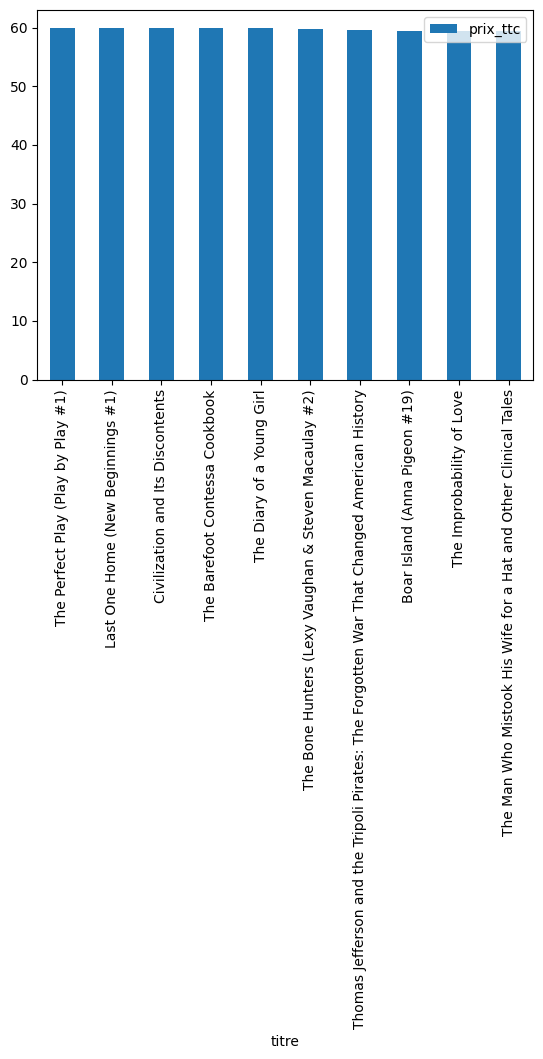

In [ ]:
query_chers = """
SELECT titre, prix_ttc
FROM livre
ORDER BY prix_ttc DESC
LIMIT 10
"""

df_chers = pd.read_sql(query_chers, conn)
df_chers.plot.bar(y='prix_ttc', x='titre')

Les 10 produits les moins chers

C:\Users\ryanh\AppData\Local\Temp\ipykernel_3640\3235749918.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_moins = pd.read_sql(query_moins, conn)


<Axes: xlabel='titre'>

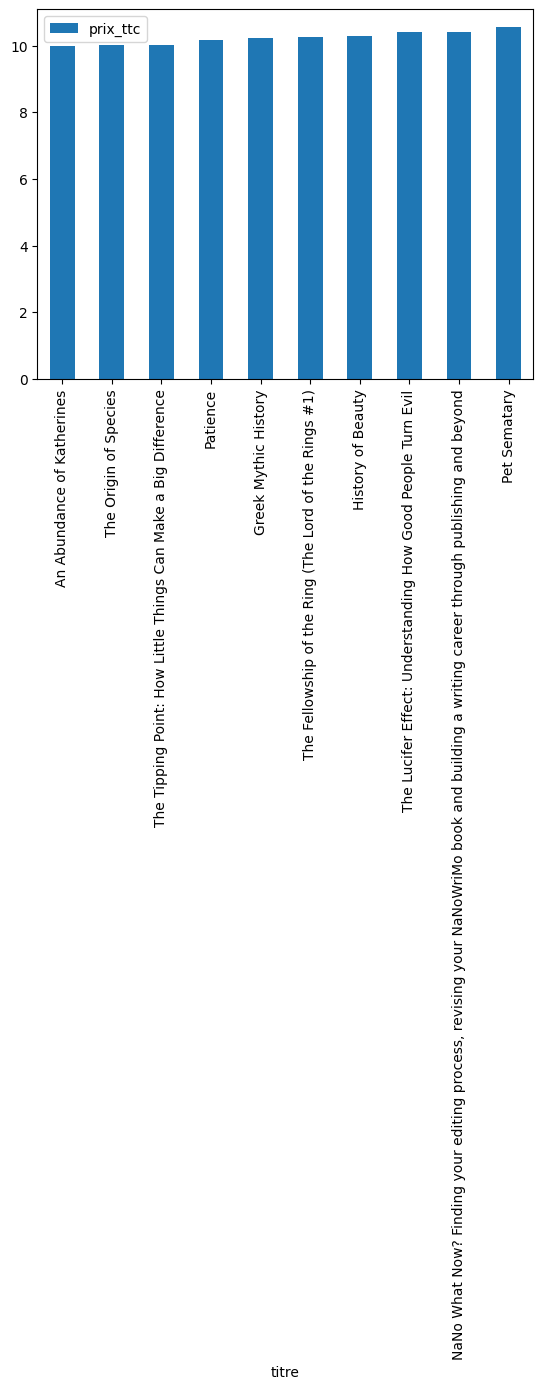

In [ ]:
query_moins = """
SELECT titre, prix_ttc
FROM livre
ORDER BY prix_ttc ASC
LIMIT 10
"""

df_moins = pd.read_sql(query_moins, conn)
df_moins.plot.bar(y='prix_ttc', x='titre')

Les 5 catégories ayant le plus de produits en stocks

C:\Users\ryanh\AppData\Local\Temp\ipykernel_3640\4012994631.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_stock = pd.read_sql(query_stock, conn)


<Axes: xlabel='categorie'>

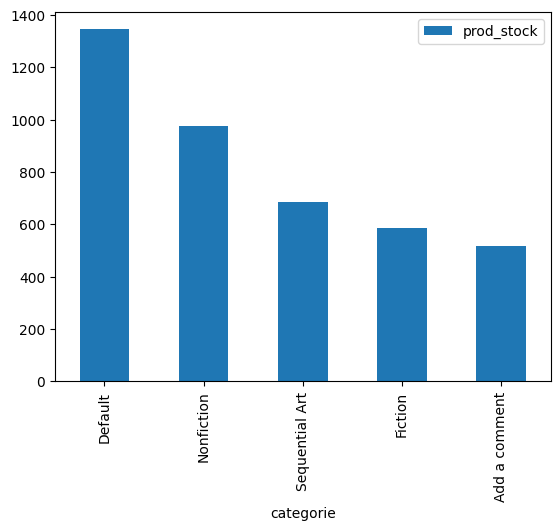

In [ ]:
query_stock = """
SELECT 	SUM(stock) AS prod_stock, categorie
FROM livre 
GROUP BY categorie
ORDER BY prod_stock desc
LIMIT 5
"""

df_stock = pd.read_sql(query_stock, conn)
df_stock.plot.bar(y='prod_stock', x='categorie')

Les trois catégories ayant les produits les plus chers

C:\Users\ryanh\AppData\Local\Temp\ipykernel_3640\3275357715.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_categ = pd.read_sql(query_categ, conn)


<Axes: xlabel='titre'>

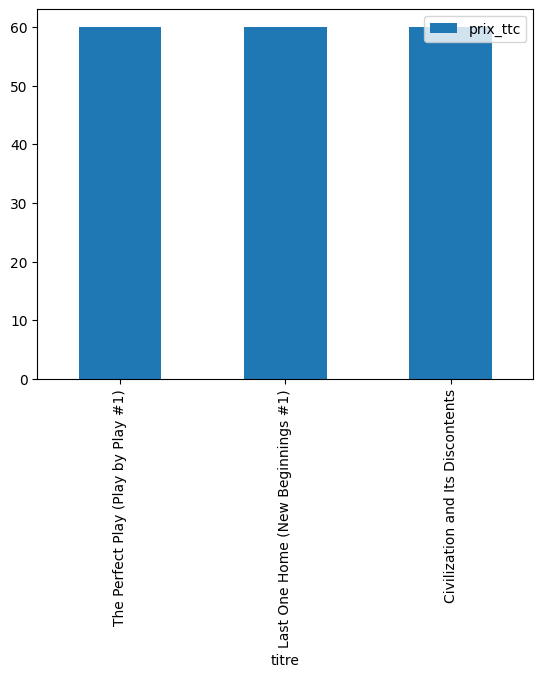

In [ ]:
query_categ = """
SELECT titre, prix_ttc, categorie
FROM livre
ORDER BY prix_ttc DESC
LIMIT 3
"""

df_categ = pd.read_sql(query_categ, conn)
df_categ.plot.bar(y='prix_ttc', x='titre')

Les différentes catégories et le nombre de livres dans chacune

In [ ]:
query_nbtitre = """
SELECT COUNT(titre) nb_livre, categorie
FROM livre
GROUP BY categorie
ORDER BY nb_livre DESC
"""

df_nbtitre = pd.read_sql(query_nbtitre, conn)
df_nbtitre

C:\Users\ryanh\AppData\Local\Temp\ipykernel_3640\645236739.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_nbtitre = pd.read_sql(query_nbtitre, conn)


,nb_livre,categorie
0,152,Default
1,110,Nonfiction
2,75,Sequential Art
3,67,Add a comment
4,65,Fiction
5,54,Young Adult
6,48,Fantasy
7,35,Romance
8,32,Mystery
9,30,Food and Drink


Le nombre de livre par note (étoiles)

In [ ]:
query_rate = """
SELECT COUNT(*) AS nb_livre, rating 
FROM livre
GROUP BY rating
ORDER BY rating
"""

df_rate = pd.read_sql(query_rate, conn)
px.pie(df_rate, values='nb_livre', names='rating')

C:\Users\ryanh\AppData\Local\Temp\ipykernel_3640\648329762.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rate = pd.read_sql(query_rate, conn)


In [ ]:
df_final['image'][0]

'../../media/cache/9e/10/9e106f81f65b293e488718a4f54a6a3f.jpg'